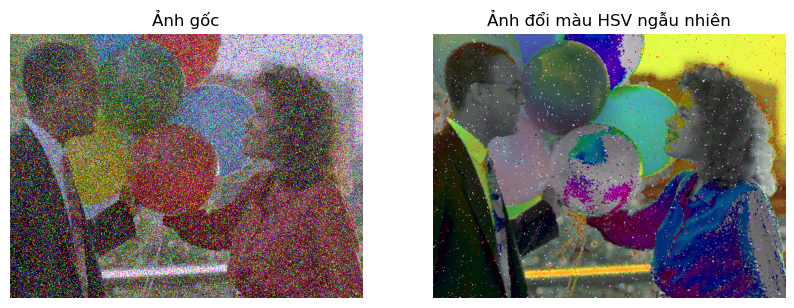

In [32]:
import numpy as np
import imageio.v2 as iio
import os
from glob import glob
from scipy.ndimage import median_filter
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import matplotlib.pyplot as plt

# Đường dẫn tới thư mục chứa ảnh
folder = './Exercise'  # Đổi lại nếu cần

# Lấy danh sách các file ảnh (jpg, png)
image_files = glob(os.path.join(folder, '*.jpg')) + glob(os.path.join(folder, '*.png'))

# Tạo thư mục lưu kết quả nếu chưa có
output_folder = './Exercise_randomhsv'
os.makedirs(output_folder, exist_ok=True)

for file in image_files:
    img = iio.imread(file)
    # Khử nhiễu bằng median filter cho từng kênh nếu là ảnh màu
    if img.ndim == 3:
        denoised = np.zeros_like(img)
        for c in range(3):
            denoised[..., c] = median_filter(img[..., c], size=3)
        img_rgb = denoised[..., :3] / 255.0
    else:
        # Nếu ảnh xám, chuyển thành ảnh màu bằng cách lặp lại kênh
        denoised = median_filter(img, size=3)
        img_rgb = np.stack([denoised]*3, axis=-1) / 255.0

    # Chuyển sang HSV
    img_hsv = rgb_to_hsv(img_rgb)

    # Sinh hoán vị ngẫu nhiên không trùng cho các kênh HSV
    perm = np.random.permutation(3)
    while np.all(perm == [0, 1, 2]):
        perm = np.random.permutation(3)
    img_hsv_random = img_hsv[..., perm]

    # Chuyển lại sang RGB
    img_new = hsv_to_rgb(img_hsv_random)
    img_new_uint8 = (img_new * 255).astype(np.uint8)

    # Lưu ảnh mới
    out_path = os.path.join(output_folder, os.path.splitext(os.path.basename(file))[0] + '_randomhsv.png')
    iio.imwrite(out_path, img_new_uint8)

    # Hiển thị ảnh gốc và ảnh đã đổi màu HSV ngẫu nhiên
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(img if img.ndim == 3 else np.stack([img]*3, axis=-1))
    axs[0].set_title('Ảnh gốc')
    axs[0].axis('off')
    axs[1].imshow(img_new_uint8)
    axs[1].set_title('Ảnh đổi màu HSV ngẫu nhiên')
    axs[1].axis('off')
    plt.show()